# Loan Application Status Prediction


Loan Application Status Prediction Problem Statement: This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

Independent Variables:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

Loan_Amount

Loan_Amount_Term

Credit History

Property_Area

Dependent Variable (Target Variable):

Loan_Status
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
#Importing Liabraries amd models and metrics for analysis and model creation
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,Ridge
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Impoting file & data
df=pd.read_csv("Loan_Application.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Exploratory data analysis for better understaning & cleaning the data

<AxesSubplot:>

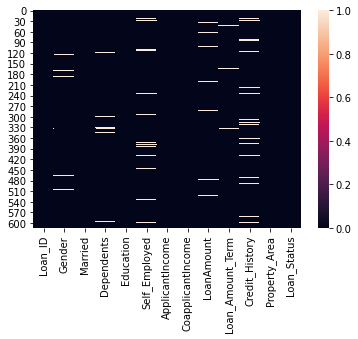

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Gender"]=imp.fit_transform(df["Gender"].values.reshape(-1,1))

In [8]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Married"]=imp.fit_transform(df["Married"].values.reshape(-1,1))

In [9]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Dependents"]=imp.fit_transform(df["Dependents"].values.reshape(-1,1))

In [10]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Self_Employed"]=imp.fit_transform(df["Self_Employed"].values.reshape(-1,1))

In [11]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
df["LoanAmount"]=imp.fit_transform(df["LoanAmount"].values.reshape(-1,1))

In [12]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="median")
df["Loan_Amount_Term"]=imp.fit_transform(df["Loan_Amount_Term"].values.reshape(-1,1))

In [13]:
#Lets convert the null value with suitable central tendency. "Age" column with median and "Cabin Column" with Mode
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df["Credit_History"]=imp.fit_transform(df["Credit_History"].values.reshape(-1,1))

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


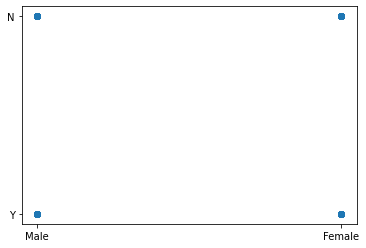

In [16]:
plt.scatter(df["Gender"],df["Loan_Status"])

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Fr

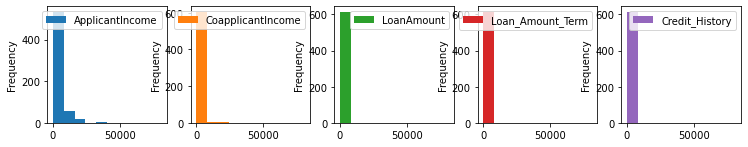

In [17]:
df.plot(kind="hist",subplots=True,layout=(6,6),figsize=(15,15))

<AxesSubplot:xlabel='Married', ylabel='count'>

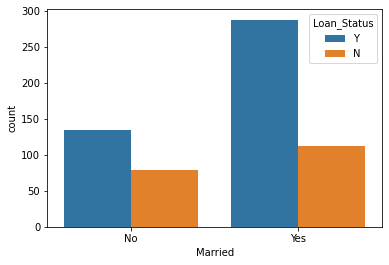

In [18]:
sns.countplot(x="Married",hue="Loan_Status",data=df)

Married people have taken more loan than the unmarried person. 

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

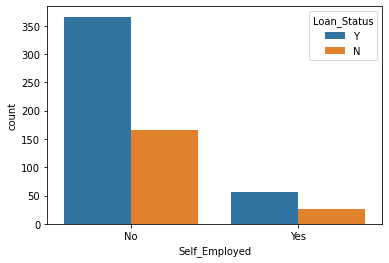

In [19]:
sns.countplot(x="Self_Employed",hue="Loan_Status",data=df)

The self employed people are less loan applicant in comparison to the unself Employed. 

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

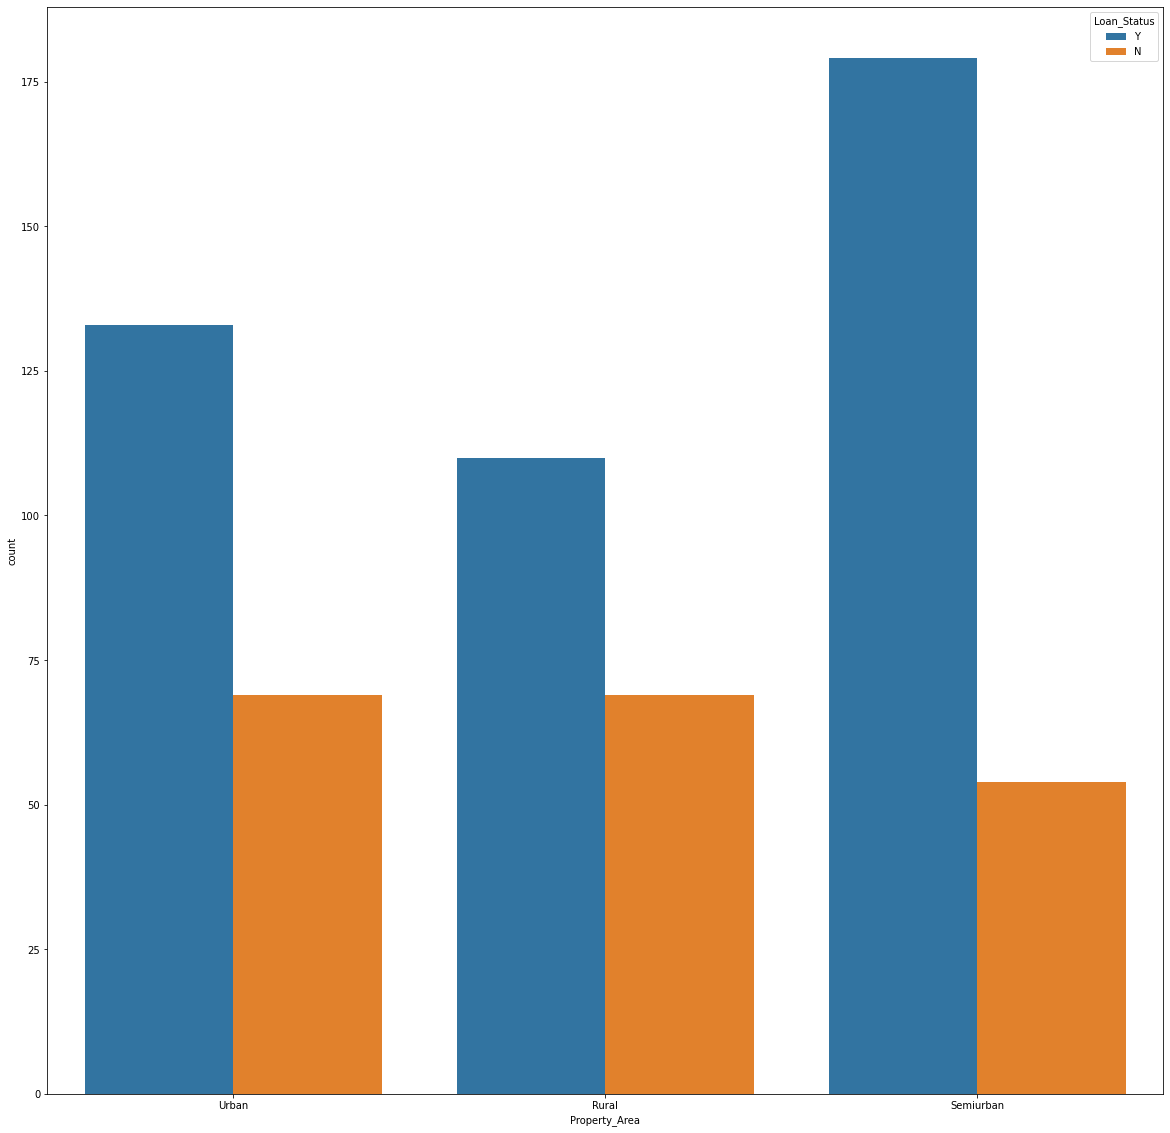

In [20]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

there are more applicant for loan from the semi unban area in comparison to unban and rural areas.  

<AxesSubplot:xlabel='Education', ylabel='count'>

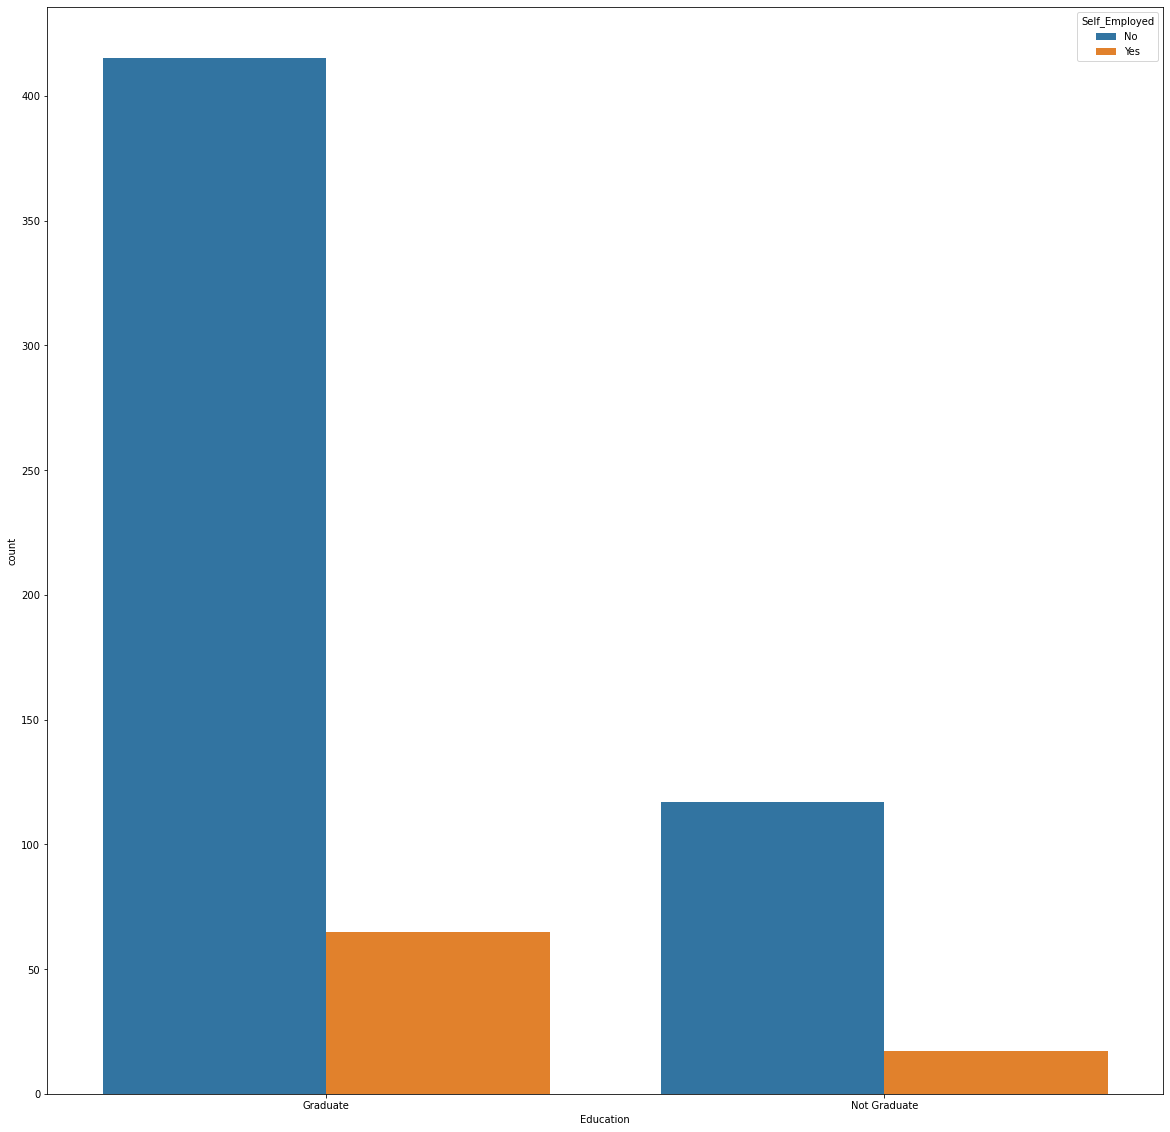

In [21]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x="Education",hue="Self_Employed",data=df)

there are very less numbers of self employed in comparison of unself employed in both categories(Graduate/Not-Graduate)

<AxesSubplot:xlabel='Gender', ylabel='count'>

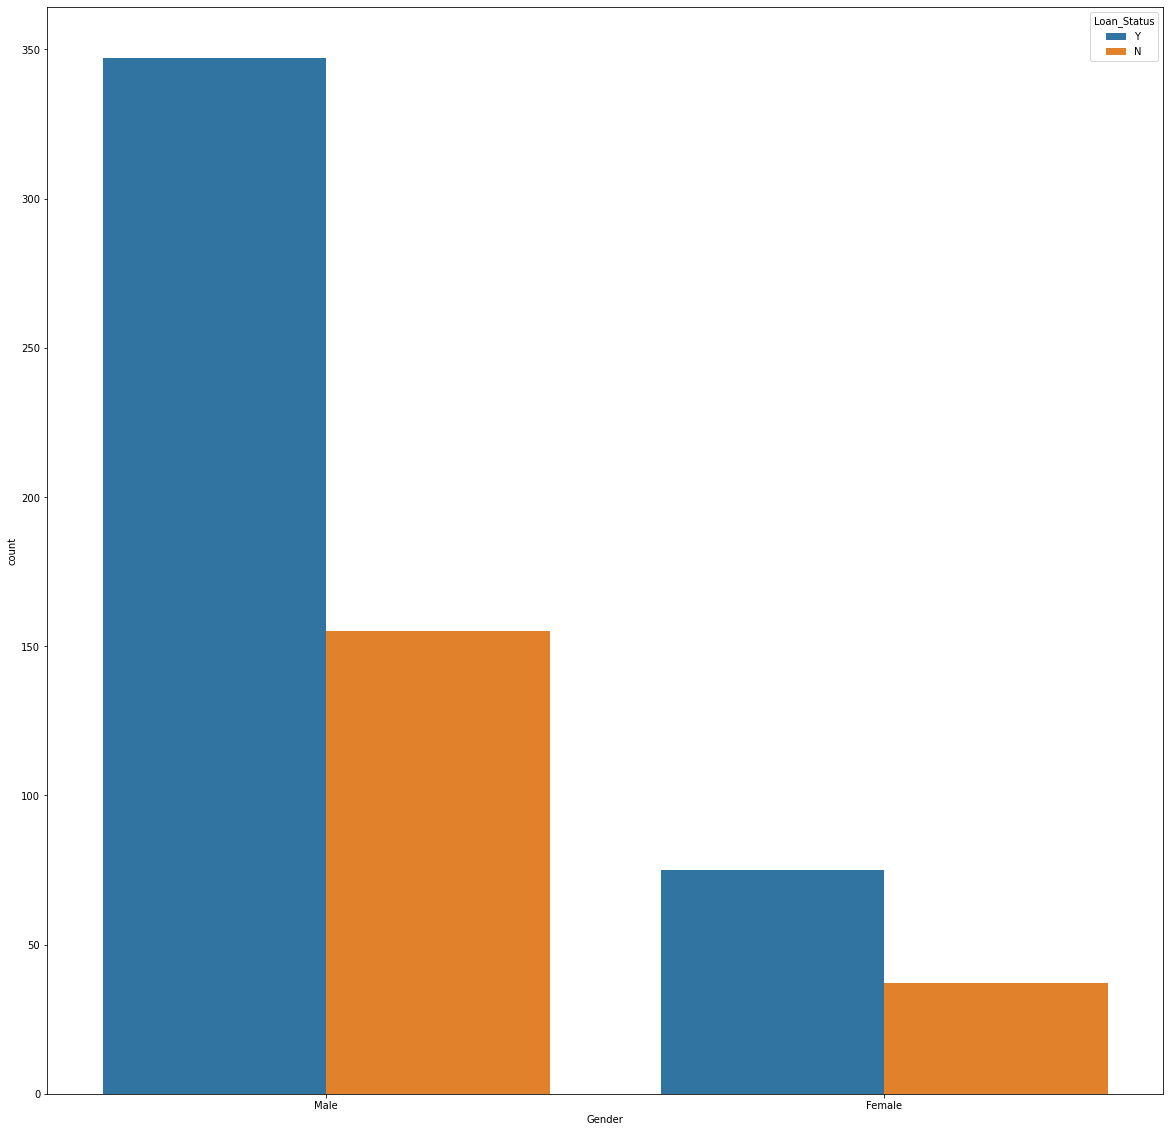

In [22]:
f, ax = plt.subplots(figsize=(20, 20))
sns.countplot(x='Gender',hue='Loan_Status',data=df)

The laon applicant are more in males in comparion to female. 

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>,
        <AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>,
        <AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

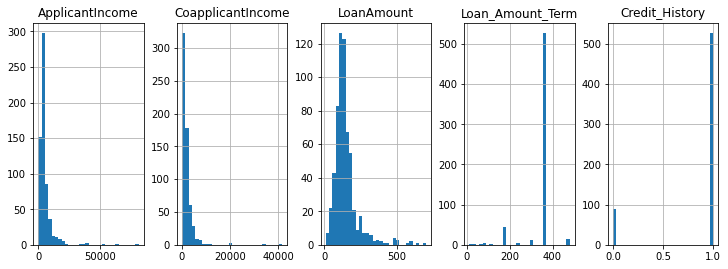

In [23]:
df.hist(figsize=(20,20),grid=True,layout=(4,8),bins=30)

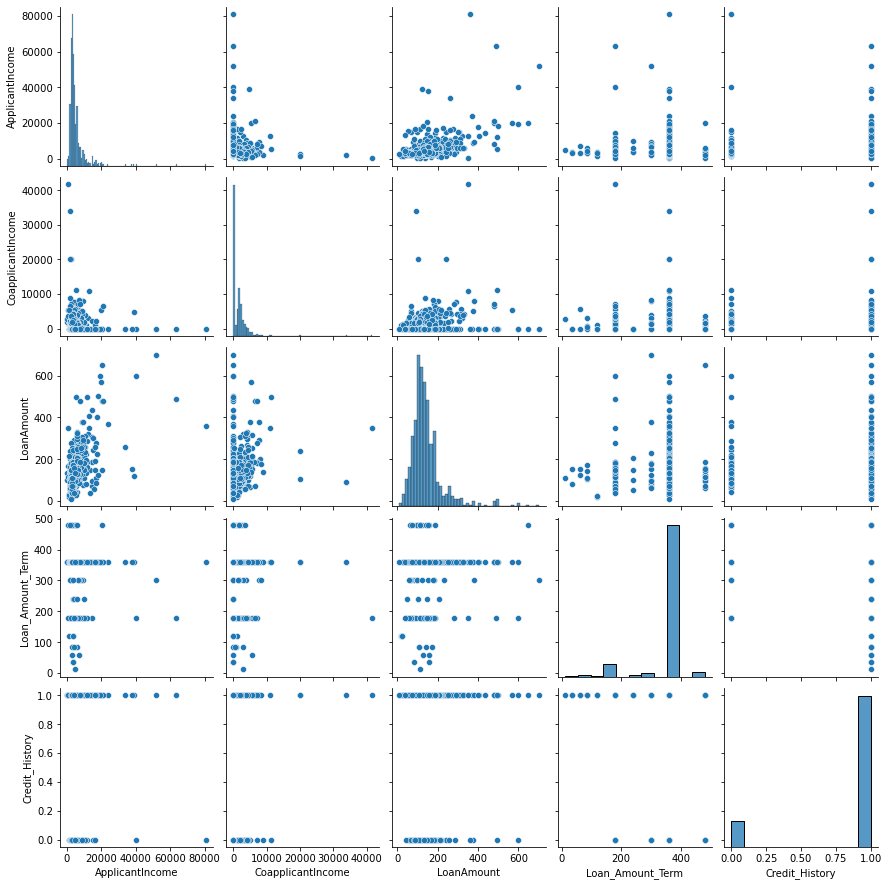

In [24]:
sns.pairplot(df)

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [26]:
#lets drop some unnecessary columns
df.drop("Loan_ID",axis=1,inplace=True)

In [27]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
#Lets Check the skewness and remove them
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

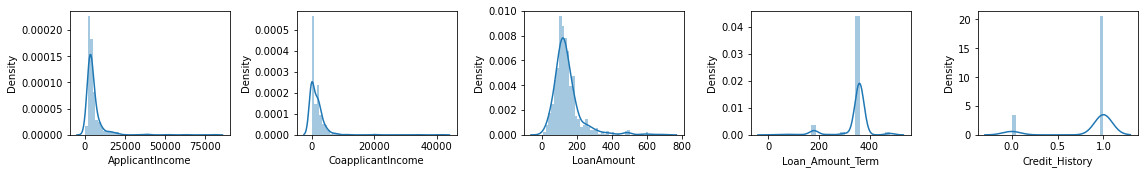

In [29]:
collist=("ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History")
ncol=5
nrows=7
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])
    plt.tight_layout()

In [30]:
import numpy as np
skew=("ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History")
for i in skew:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [31]:
#Skewness is removed
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

In [32]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [33]:
#Coverting object data in float/Integer by using label Encoding  
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"].astype(str))
df["Married"]=le.fit_transform(df["Married"].astype(str))
df["Dependents"]=le.fit_transform(df["Dependents"].astype(str))
df["Education"]=le.fit_transform(df["Education"].astype(str))
df["Self_Employed"]=le.fit_transform(df["Self_Employed"].astype(str))
df["Property_Area"]=le.fit_transform(df["Property_Area"].astype(str))
df["Loan_Status"]=le.fit_transform(df["Loan_Status"].astype(str))

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1


In [35]:
#The entire data is converted into integer/float for further analysis
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Gender                  AxesSubplot(0.125,0.749828;0.0945122x0.130172)
Married              AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
Dependents           AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
Education            AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
Self_Employed        AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
ApplicantIncome      AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
CoapplicantIncome    AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
LoanAmount              AxesSubplot(0.125,0.593621;0.0945122x0.130172)
Loan_Amount_Term     AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
Credit_History       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
Property_Area        AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
Loan_Status          AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
dtype: object

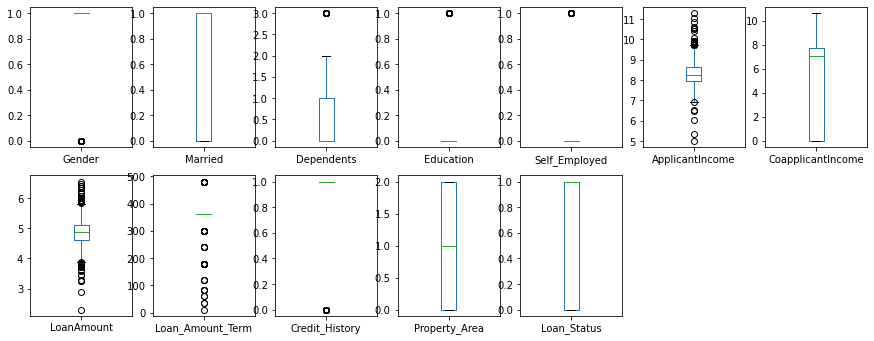

In [36]:
#Checking outliers
df.plot(kind="box",subplots=True,layout=(5,7),figsize=(15,15))

<AxesSubplot:>

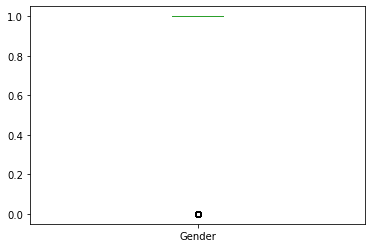

In [37]:
#Spotting Outliers
df["Gender"].plot.box()

<AxesSubplot:>

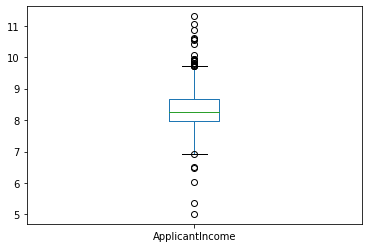

In [38]:
df["ApplicantIncome"].plot.box()

<AxesSubplot:>

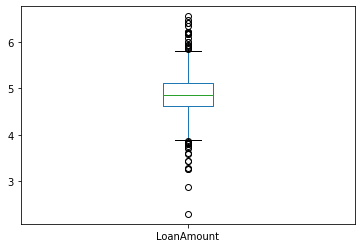

In [39]:
df["LoanAmount"].plot.box()

<AxesSubplot:>

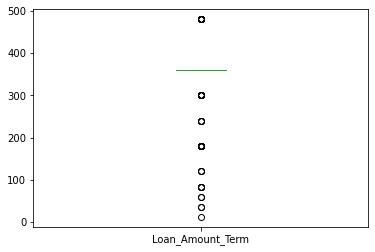

In [40]:
df["Loan_Amount_Term"].plot.box()

In [41]:
#Identifying outliers and removing them 
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.47234264, 1.37208932, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.73780632, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.25346957, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.24474546, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.73780632, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [42]:
threshold=3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([7, 8, 8, 7, 8, 7, 7, 8, 5, 7, 5, 7, 5, 5, 5, 8, 8, 8, 5, 7, 5, 5,
       5, 8, 8, 8, 7, 7, 7, 8, 8, 5], dtype=int64))


In [43]:
df=df[(z<3).all(axis=1)]

In [44]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,1,1,3,0,0,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,2,1


Now the outliers have been removed

In [45]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000
mean,0.819421,0.650767,0.727428,0.221465,0.129472,8.322989,4.326224,4.867387,348.245315,0.851789,1.030664,0.688245
std,0.384997,0.477134,1.000331,0.415587,0.336008,0.551221,3.866719,0.438535,51.424962,0.355612,0.789703,0.463605
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.470800,0.000000,3.433987,180.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.963808,0.000000,4.620047,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,8.243019,7.135687,4.859812,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,8.649361,7.737826,5.093750,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10.077609,10.429340,6.216606,480.000000,1.000000,2.000000,1.000000


In [46]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.371416,0.191008,0.047731,-0.003641,0.049883,0.236224,0.162320,-0.102224,0.016074,-0.021046,0.009121
Married,0.371416,1.000000,0.336521,0.020657,-0.004878,0.001504,0.324897,0.192500,-0.125863,0.016260,0.014883,0.085557
Dependents,0.191008,0.336521,1.000000,0.059251,0.059480,0.120332,0.006903,0.144762,-0.084284,-0.027410,-0.006683,0.007798
Education,0.047731,0.020657,0.059251,1.000000,-0.010160,-0.182252,0.049749,-0.141355,-0.093574,-0.077740,-0.067525,-0.092751
Self_Employed,-0.003641,-0.004878,0.059480,-0.010160,1.000000,0.193255,-0.078982,0.115984,-0.030284,-0.010510,-0.034281,-0.025269
ApplicantIncome,0.049883,0.001504,0.120332,-0.182252,0.193255,1.000000,-0.371874,0.495359,-0.057251,0.047730,-0.039505,-0.009139
CoapplicantIncome,0.236224,0.324897,0.006903,0.049749,-0.078982,-0.371874,1.000000,0.166320,0.004481,0.001844,-0.055184,0.066159
LoanAmount,0.162320,0.192500,0.144762,-0.141355,0.115984,0.495359,0.166320,1.000000,0.064391,0.002233,-0.097505,-0.041038
Loan_Amount_Term,-0.102224,-0.125863,-0.084284,-0.093574,-0.030284,-0.057251,0.004481,0.064391,1.000000,0.027747,-0.056662,-0.020837
Credit_History,0.016074,0.016260,-0.027410,-0.077740,-0.010510,0.047730,0.001844,0.002233,0.027747,1.000000,-0.008095,0.557678


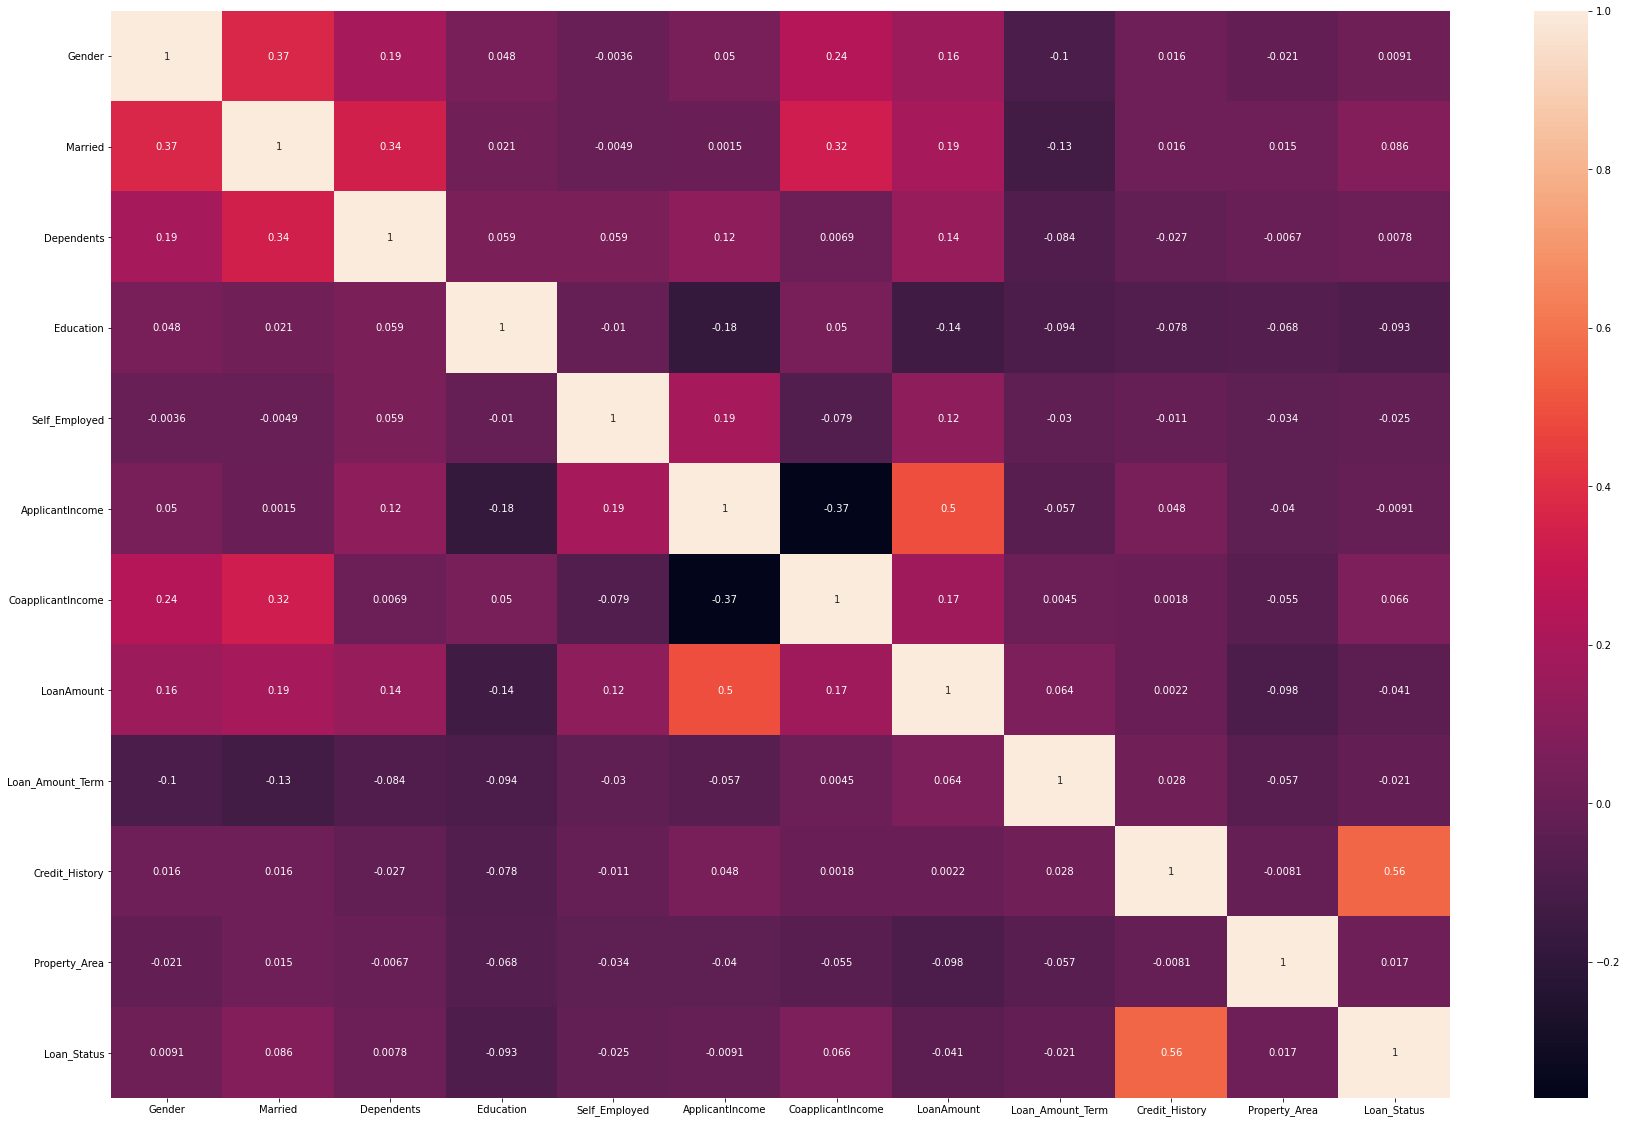

In [47]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

the columns are not so correlated. 

In [48]:
df.shape

(587, 12)

# Lets now  find out the prediction of the frauds by using different Classification models

In [49]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [50]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,3,0,0,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,1,0,0,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,2,0,0,8.933796,0.000000,5.236442,360.0,1.0,2


In [51]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 587, dtype: int32

In [52]:
x.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [53]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 587, dtype: int32

In [54]:
y.value_counts()

1    404
0    183
Name: Loan_Status, dtype: int64

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [56]:
LG=LogisticRegression()

In [57]:
LG.fit(x_train,y_train)

LogisticRegression()

In [58]:
LG.fit(x_train,y_train)
LG.score(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))

0.8531073446327684
[[ 29  25]
 [  1 122]]
              precision    recall  f1-score   support

           0       0.97      0.54      0.69        54
           1       0.83      0.99      0.90       123

    accuracy                           0.85       177
   macro avg       0.90      0.76      0.80       177
weighted avg       0.87      0.85      0.84       177



In [59]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6949152542372882
[[  0  54]
 [  0 123]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.69      1.00      0.82       123

    accuracy                           0.69       177
   macro avg       0.35      0.50      0.41       177
weighted avg       0.48      0.69      0.57       177



In [60]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.6949152542372882
[[  0  54]
 [  0 123]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.69      1.00      0.82       123

    accuracy                           0.69       177
   macro avg       0.35      0.50      0.41       177
weighted avg       0.48      0.69      0.57       177



In [61]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7288135593220338
[[30 24]
 [24 99]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56        54
           1       0.80      0.80      0.80       123

    accuracy                           0.73       177
   macro avg       0.68      0.68      0.68       177
weighted avg       0.73      0.73      0.73       177



In [62]:
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(x_train,y_train)
KNN.score(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7231638418079096
[[ 17  37]
 [ 12 111]]
              precision    recall  f1-score   support

           0       0.59      0.31      0.41        54
           1       0.75      0.90      0.82       123

    accuracy                           0.72       177
   macro avg       0.67      0.61      0.61       177
weighted avg       0.70      0.72      0.69       177



In [63]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=42) # default(n_estimators=100) for RandomForestClassifier
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8531073446327684
[[ 32  22]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.89      0.59      0.71        54
           1       0.84      0.97      0.90       123

    accuracy                           0.85       177
   macro avg       0.87      0.78      0.81       177
weighted avg       0.86      0.85      0.84       177



In [64]:
from sklearn.ensemble import AdaBoostClassifier
#AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=50,Learning_rate=1.0)
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8022598870056498
[[ 27  27]
 [  8 115]]
              precision    recall  f1-score   support

           0       0.77      0.50      0.61        54
           1       0.81      0.93      0.87       123

    accuracy                           0.80       177
   macro avg       0.79      0.72      0.74       177
weighted avg       0.80      0.80      0.79       177



In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.807909604519774
[[ 26  28]
 [  6 117]]
              precision    recall  f1-score   support

           0       0.81      0.48      0.60        54
           1       0.81      0.95      0.87       123

    accuracy                           0.81       177
   macro avg       0.81      0.72      0.74       177
weighted avg       0.81      0.81      0.79       177



In [66]:
score=cross_val_score(LG,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80508475 0.79661017 0.78632479 0.86324786 0.82905983]
0.8160654787773431
0.02749045248114674


In [67]:
score=cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68644068 0.68644068 0.69230769 0.69230769 0.68376068]
0.6882514848616544
0.0034534323634618433


In [68]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.68644068 0.62711864 0.73504274 0.76068376 0.70940171]
0.7037375054324208
0.04566093900024849


In [69]:
score=cross_val_score(KNN,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73728814 0.70338983 0.76923077 0.73504274 0.70940171]
0.7308706359553818
0.023435869997418847


In [70]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77118644 0.77966102 0.76923077 0.87179487 0.81196581]
0.8007677821237144
0.03869206073491814


In [71]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75423729 0.75423729 0.78632479 0.82905983 0.76923077]
0.7786179921773142
0.02785940056032029


In [72]:
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77118644 0.72881356 0.76923077 0.84615385 0.8034188 ]
0.7837606837606839
0.03916060487617334


We can see that the Logistics classifier is giving the best results (85.31%) with the best cross validation score (81.60%) so we are proceeding the same for the prediction.  

In [73]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [74]:
y_pred_prob=LG.predict_proba(x_test)[:,-1]

In [75]:
y_pred_prob

array([0.61525699, 0.26872783, 0.20210654, 0.76990736, 0.79452521,
       0.84028725, 0.1048989 , 0.846181  , 0.76067562, 0.12104826,
       0.74219715, 0.23071389, 0.72087717, 0.79693037, 0.64744643,
       0.82318003, 0.22537874, 0.09475407, 0.85030734, 0.14355348,
       0.64984692, 0.79336235, 0.81472609, 0.75948961, 0.71486345,
       0.8093018 , 0.74523878, 0.84138816, 0.09583322, 0.81131835,
       0.8205734 , 0.6353263 , 0.18916066, 0.70719467, 0.81900632,
       0.75351889, 0.08588671, 0.27719235, 0.85838081, 0.65853691,
       0.5488822 , 0.82732374, 0.8082644 , 0.88692166, 0.70178734,
       0.82231145, 0.06837134, 0.70188189, 0.11573068, 0.78681168,
       0.80580644, 0.67481724, 0.12937608, 0.1027843 , 0.60728509,
       0.76620822, 0.73930793, 0.79688342, 0.71836608, 0.62141963,
       0.6595593 , 0.76341085, 0.7200738 , 0.86157733, 0.7561177 ,
       0.14106867, 0.65119682, 0.66872545, 0.79916006, 0.19939862,
       0.84931757, 0.93314535, 0.09249898, 0.78987378, 0.83053

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [77]:
fpr

array([0.        , 0.        , 0.        , 0.01851852, 0.01851852,
       0.03703704, 0.03703704, 0.05555556, 0.05555556, 0.07407407,
       0.07407407, 0.09259259, 0.09259259, 0.11111111, 0.11111111,
       0.12962963, 0.12962963, 0.14814815, 0.14814815, 0.16666667,
       0.16666667, 0.18518519, 0.18518519, 0.2037037 , 0.2037037 ,
       0.22222222, 0.22222222, 0.24074074, 0.24074074, 0.25925926,
       0.25925926, 0.27777778, 0.27777778, 0.2962963 , 0.2962963 ,
       0.33333333, 0.33333333, 0.35185185, 0.35185185, 0.37037037,
       0.37037037, 0.38888889, 0.38888889, 0.40740741, 0.40740741,
       0.42592593, 0.42592593, 0.44444444, 0.44444444, 0.46296296,
       0.46296296, 0.85185185, 0.85185185, 1.        ])

In [78]:
tpr

array([0.        , 0.00813008, 0.01626016, 0.01626016, 0.06504065,
       0.06504065, 0.25203252, 0.25203252, 0.26829268, 0.26829268,
       0.27642276, 0.27642276, 0.31707317, 0.31707317, 0.34146341,
       0.34146341, 0.35772358, 0.35772358, 0.38211382, 0.38211382,
       0.43089431, 0.43089431, 0.4796748 , 0.4796748 , 0.5203252 ,
       0.5203252 , 0.58536585, 0.58536585, 0.60162602, 0.60162602,
       0.61788618, 0.61788618, 0.62601626, 0.62601626, 0.63414634,
       0.63414634, 0.64227642, 0.64227642, 0.82113821, 0.82113821,
       0.83739837, 0.83739837, 0.86178862, 0.86178862, 0.93495935,
       0.93495935, 0.97560976, 0.97560976, 0.98373984, 0.98373984,
       0.99186992, 0.99186992, 1.        , 1.        ])

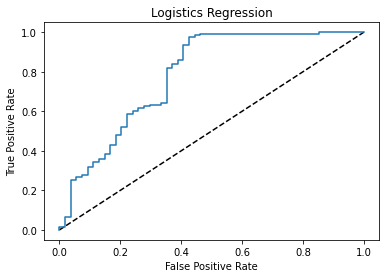

In [79]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="Logistics Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistics Regression")
plt.show()

# Saving the MODEL

In [80]:
import pickle
filename='Loanapplicationfraud.pkl'
pickle.dump(LG,open(filename,'wb'))
loaded_model=pickle.load(open(filename,"rb"))
loaded_model.predict(x_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1])